In [1]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector

In [2]:
#Try the case from the Brilliant Example , X , H H , X

In [3]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

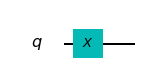

In [5]:
#X (not) GATE ACTING ON |0>
qc = QuantumCircuit(1) #make a QC with 1 quantum bit 
cr = ClassicalRegister(1) # make a classical register with 1 classical bit

qc.x(0) #add the quantum not gate rotate by 180 degrees around x axis

qc.draw(output='mpl') #draw the circuit

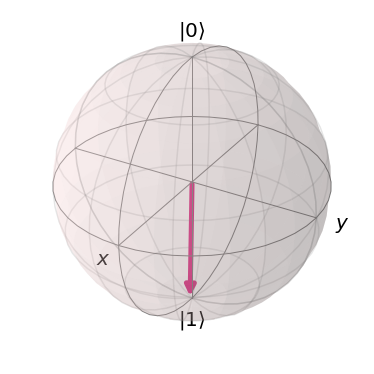

In [6]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )
    
plot_bloch_vector( bloch_vector )

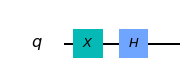

In [7]:
#ADD A HADMARD GATE TO THE MIX
qc.h(0) #add hadamrd gate to create superposition, should rotate to -x axis

qc.draw(output='mpl') #draw the circuit

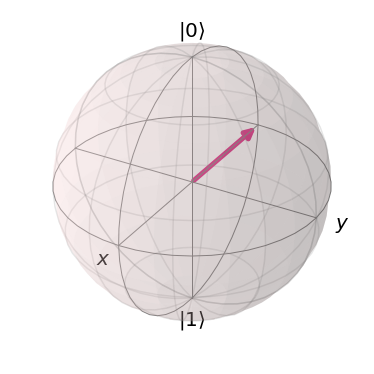

In [8]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )
    
plot_bloch_vector( bloch_vector )

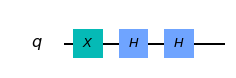

In [9]:
#ADD another HADMARD GATE TO THE MIX
qc.h(0) #add hadamrd gate to create superposition, should rotate back to 1

qc.draw(output='mpl') #draw the circuit

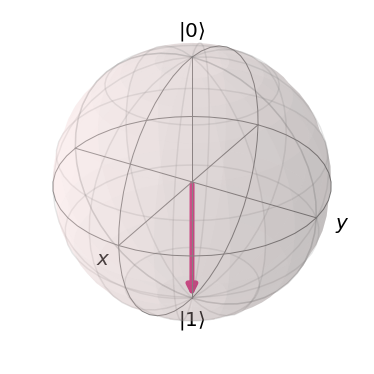

In [10]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )
    
plot_bloch_vector( bloch_vector )

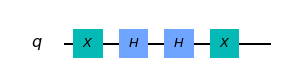

In [11]:
#ADD another X GATE TO THE MIX
qc.x(0) #add not gate to the mix and this recreates the |0> state we started with

qc.draw(output='mpl') #draw the circuit

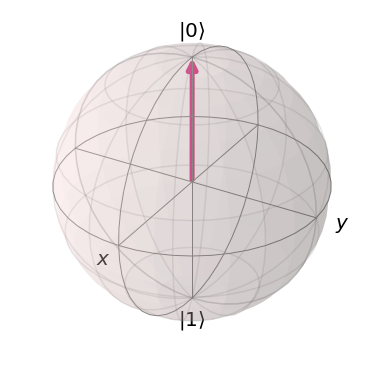

In [12]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )
    
plot_bloch_vector( bloch_vector )

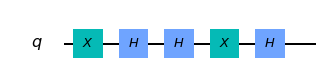

In [13]:
#ADD another H GATE TO THE MIX
qc.h(0) #add not gate to the mix and this recreates the Schroding cat State

qc.draw(output='mpl') #draw the circuit

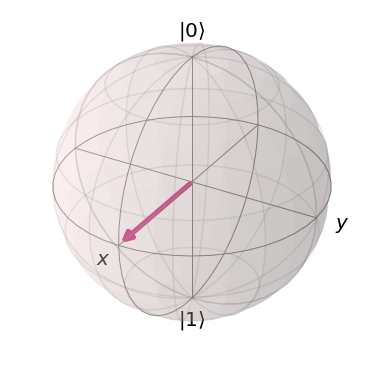

In [14]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )
    
plot_bloch_vector( bloch_vector )

In [15]:
qc.add_register( cr ) #Add the classical register to the quantum circuit

In [17]:
qc.measure(0,0) #MEASURE THE QUANTUM CIRCUIT (COLLAPSE THE WAVEFUNCTION) BY MAPPING TO CLASSICAL BITS

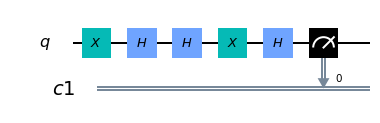

In [18]:
qc.draw(output='mpl') #draw the circuit

In [22]:
emulator = Aer.get_backend('qasm_simulator') #GET THE SIMULATOR BACKEND (NO NOISE) 

job = execute( qc, emulator, shots=100000 ) #SIMULATE THE QC DRAWN ABOVE FOR 100000 ITERATIONS

In [23]:
hist = job.result().get_counts() #GET THE RESULT OF THE SIMULATOR AND PRINT 
print(hist)

{'0': 50067, '1': 49933}


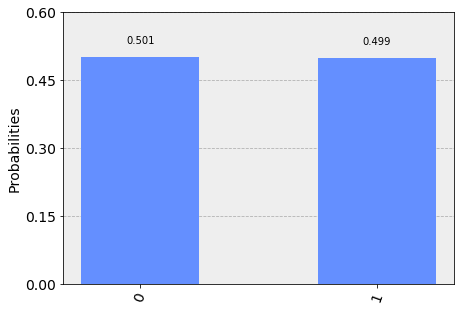

In [24]:
plot_histogram( hist )